In [105]:
import pandas as pd

file_path_new = 'netflix_titles.csv'
data_new = pd.read_csv(file_path_new)

data_new.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [106]:
# Veri setinde eksik değerlerin kontrolü
missing_values = data_new.isnull().sum()

# Eksik değerlerin sayısı
missing_values



show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

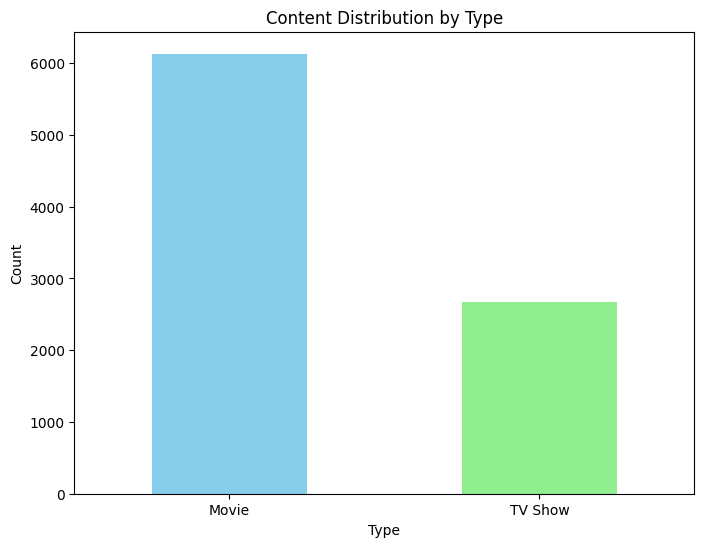

In [107]:
import matplotlib.pyplot as plt

content_type_count = data_new['type'].value_counts()

plt.figure(figsize=(8, 6))
content_type_count.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Content Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


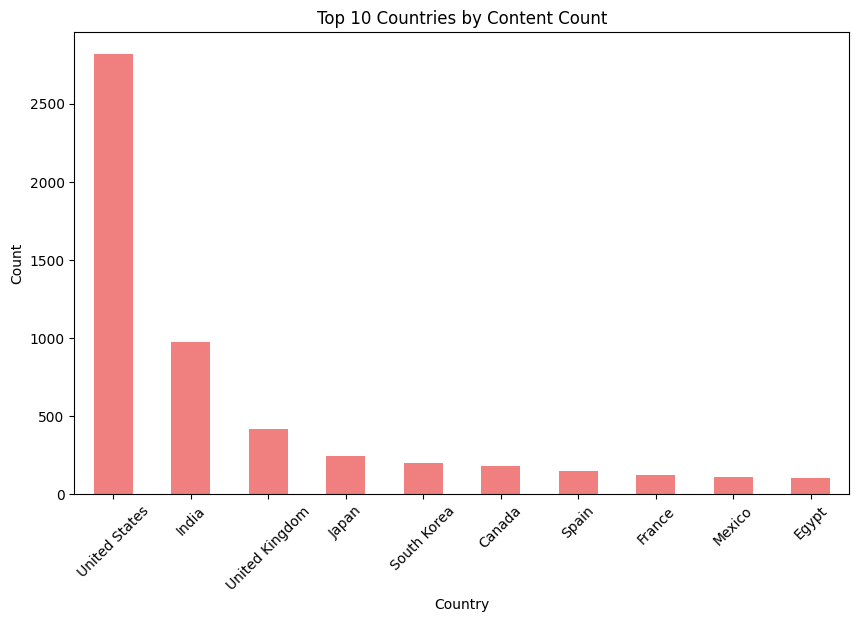

In [108]:
# Ülkelere göre içerik sayısı
country_count = data_new['country'].value_counts().head(10)  # İlk 10 ülke

# görselleştirme
plt.figure(figsize=(10, 6))
country_count.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


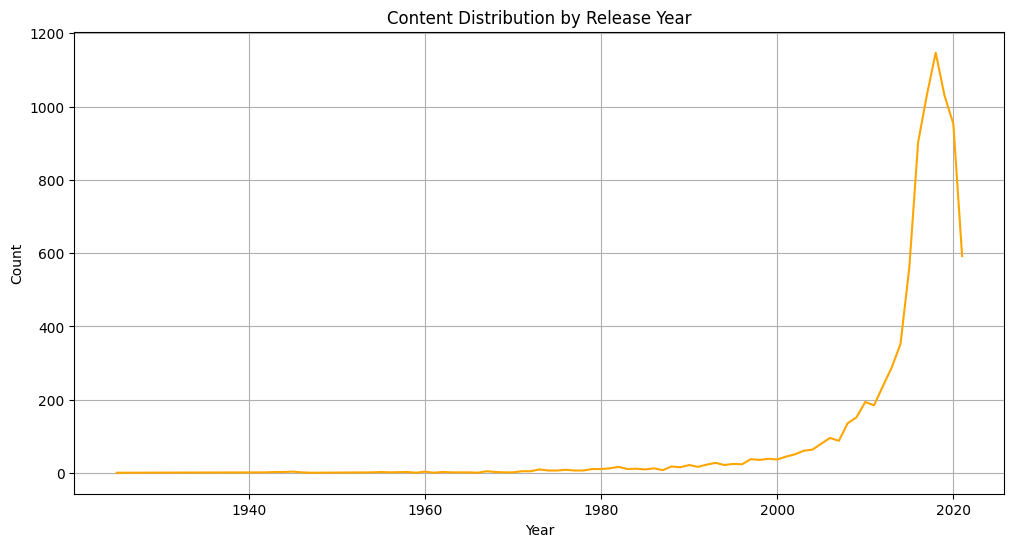

In [109]:
# Yayın yılına göre içerik sayısı
release_year_count = data_new['release_year'].value_counts().sort_index()

# görselleştirme
plt.figure(figsize=(12, 6))
release_year_count.plot(kind='line', color='orange')
plt.title('Content Distribution by Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


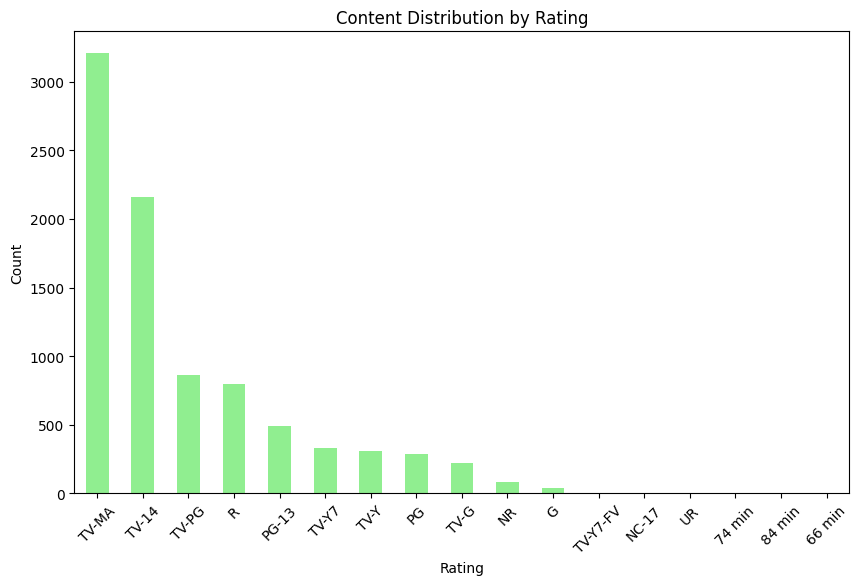

In [110]:
# Yaş sınıfına göre içerik sayısı
rating_count = data_new['rating'].value_counts()

# görselleştirme
plt.figure(figsize=(10, 6))
rating_count.plot(kind='bar', color='lightgreen')
plt.title('Content Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


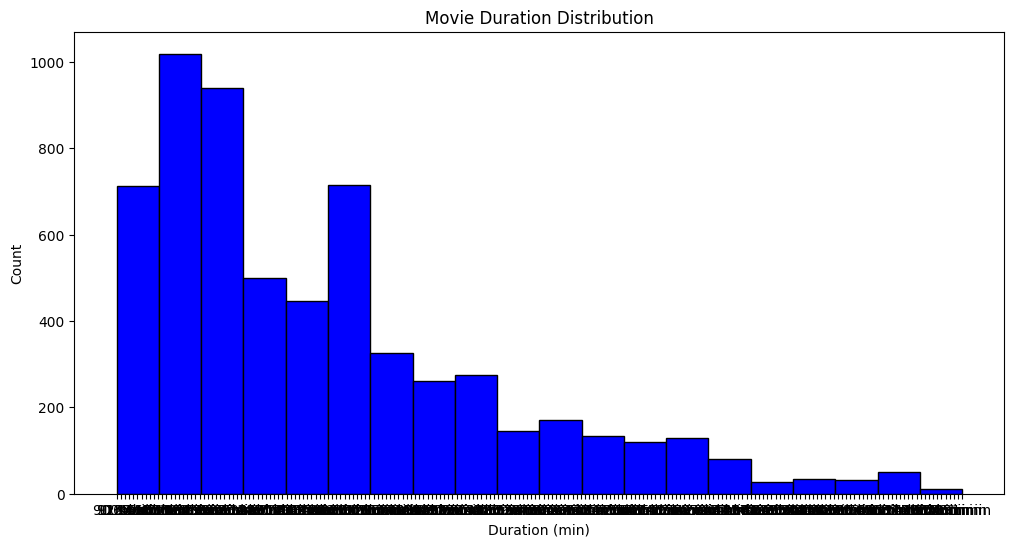

In [111]:
# Film ve TV dizilerinin süre bilgileri
data_new['duration'] = data_new['duration']

# Film sürelerine göre dağılım
film_duration = data_new[data_new['type'] == 'Movie']['duration'].dropna()

plt.figure(figsize=(12, 6))
plt.hist(film_duration, bins=20, color='blue', edgecolor='black')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.show()


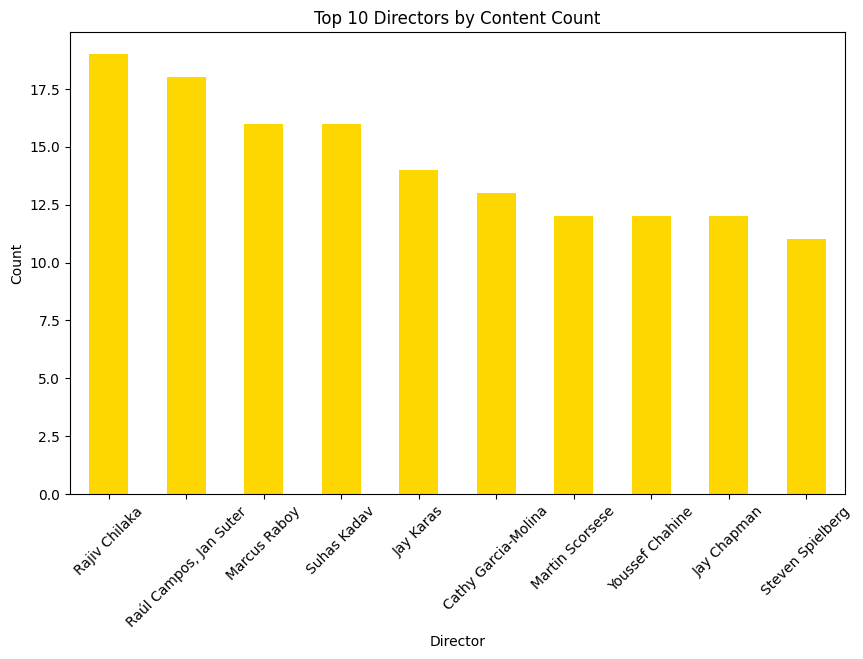

In [112]:
# Yönetmenler için içerik sayısı
director_count = data_new['director'].dropna().value_counts().head(10)

# görselleştirme
plt.figure(figsize=(10, 6))
director_count.plot(kind='bar', color='gold')
plt.title('Top 10 Directors by Content Count')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


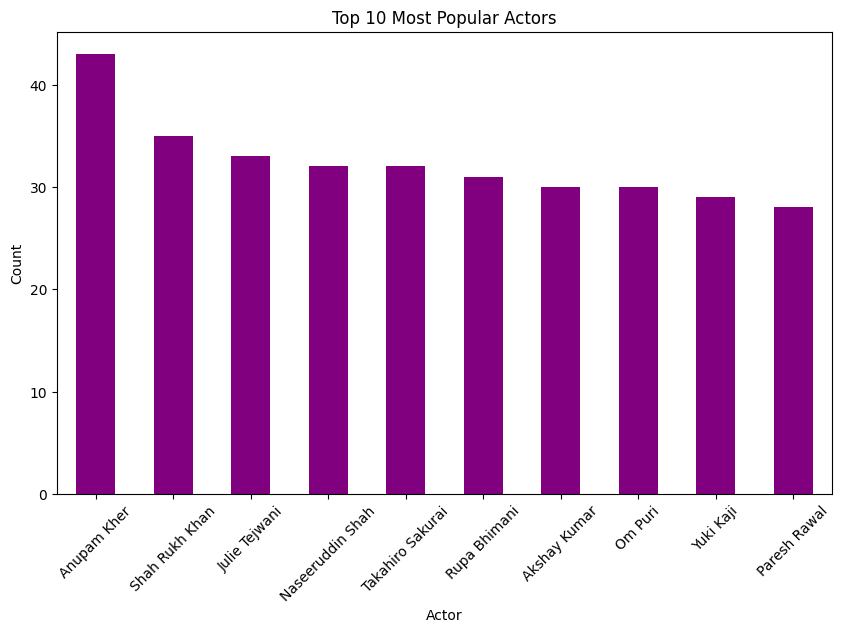

In [113]:
#  en popüler oyuncular
cast_series = data_new['cast'].dropna().str.split(',').explode().str.strip()
cast_count = cast_series.value_counts().head(10)

# görselleştirme
plt.figure(figsize=(10, 6))
cast_count.plot(kind='bar', color='purple')
plt.title('Top 10 Most Popular Actors')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


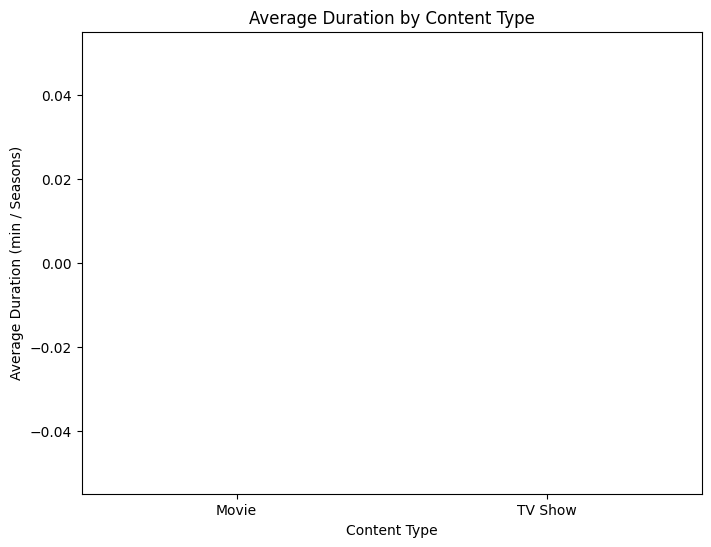

In [147]:
# İçerik türlerine göre ortalama süre
# TV dizilerinin sürelerini, sezon sayısına çevirilmesi ( '2 Seasons' -> 2)
data_new['duration_numeric'] = data_new['duration'].apply(pd.to_numeric, errors='coerce')

# Türlere göre ortalama süre
avg_duration_by_type = data_new.groupby('type')['duration_numeric'].mean()

# görselleştirme
plt.figure(figsize=(8, 6))
avg_duration_by_type.plot(kind='bar', color='lightblue')
plt.title('Average Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Duration (min / Seasons)')
plt.xticks(rotation=0)
plt.show()


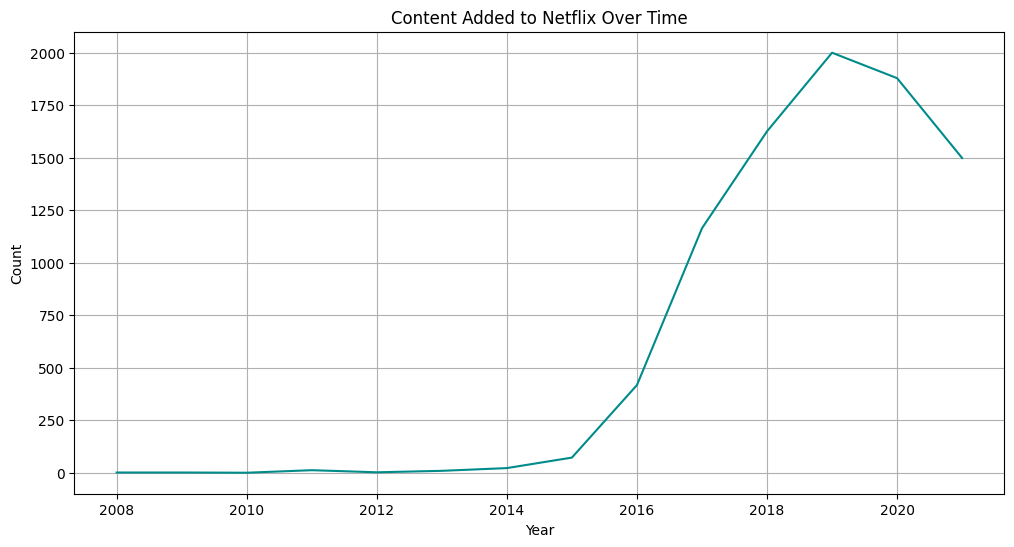

In [115]:
# Netflix'e eklenen içeriklerin yıllık sayısı
data_new['date_added'] = pd.to_datetime(data_new['date_added'], errors='coerce')
data_new['year_added'] = data_new['date_added'].dt.year

# Yıllık içerik sayısı
content_added_per_year = data_new['year_added'].value_counts().sort_index()

# görselleştirme
plt.figure(figsize=(12, 6))
content_added_per_year.plot(kind='line', color='darkcyan')
plt.title('Content Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


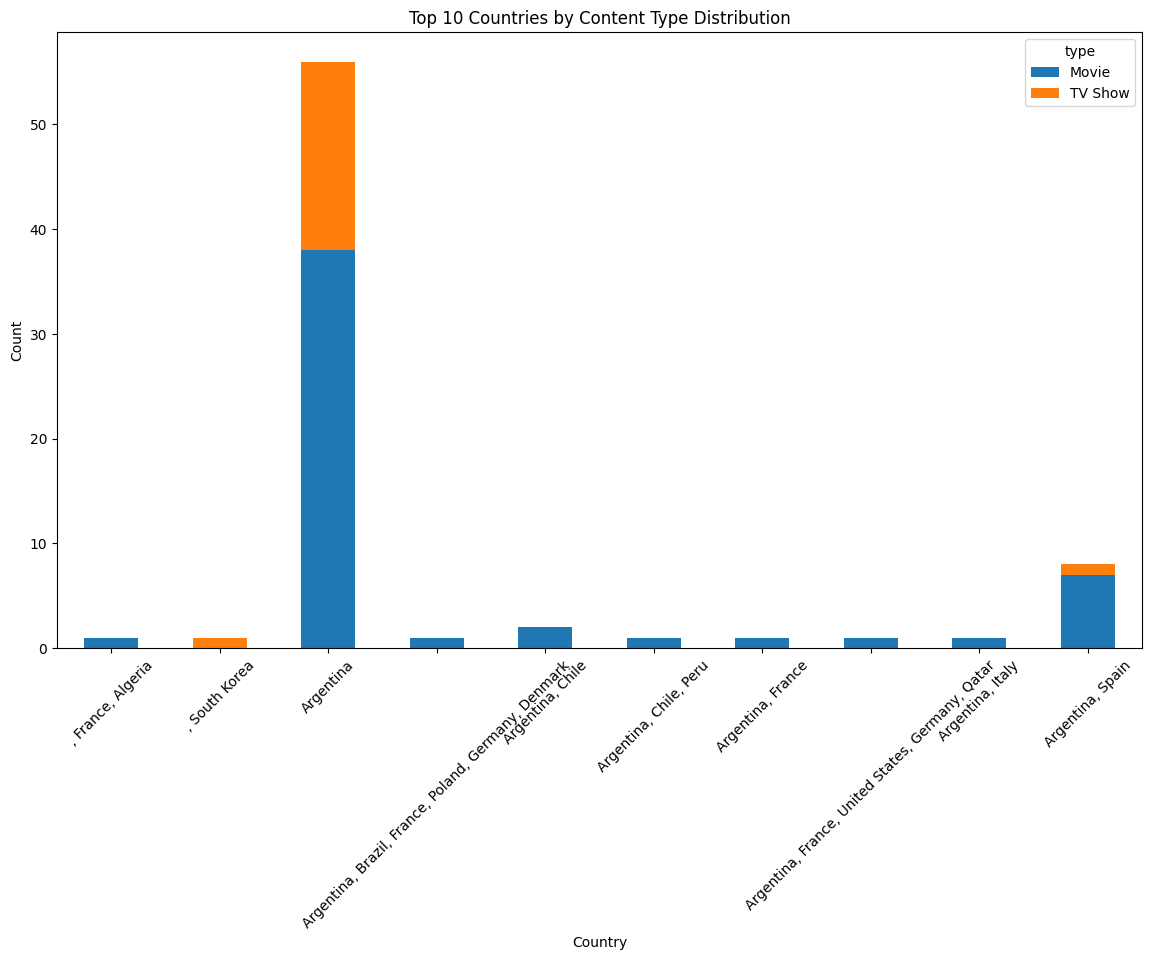

In [116]:
# İçerik türlerine göre ülke sayısı
country_type_count = data_new.groupby(['country', 'type']).size().unstack().fillna(0)

# En popüler içerik türlerini görselleştirelim
country_type_count.head(10).plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 10 Countries by Content Type Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


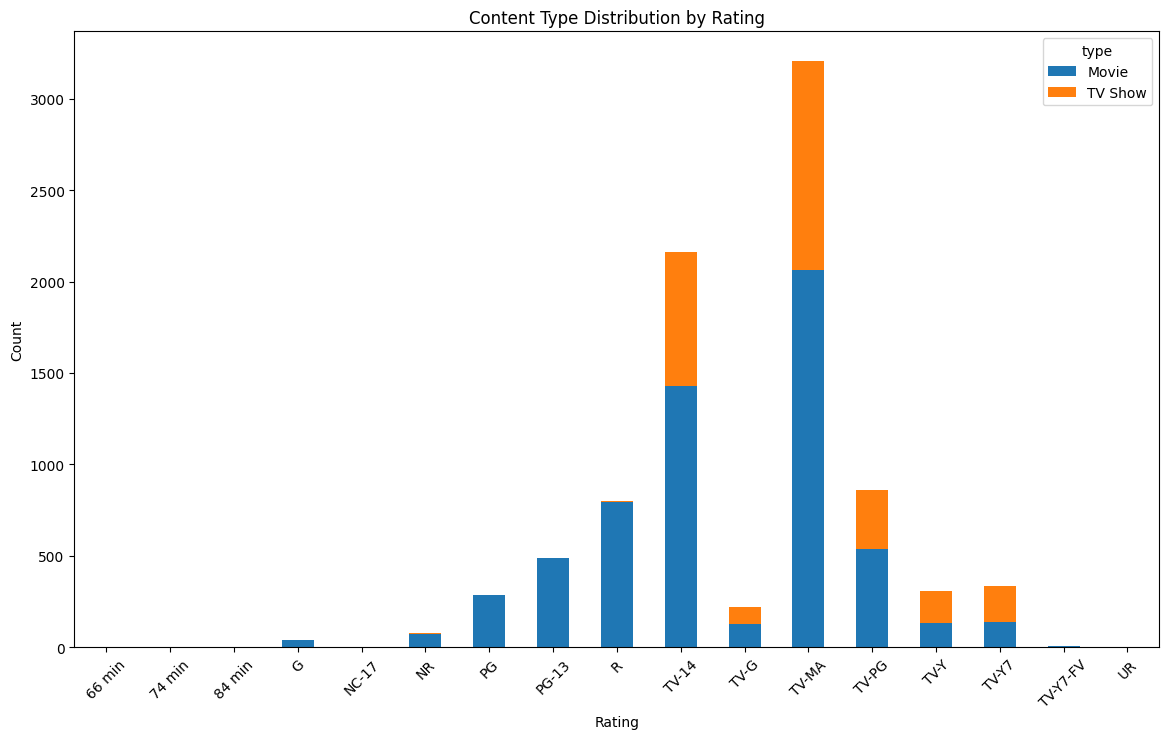

In [117]:
# Rating ve Type arasındaki ilişkiyi analiz edelim
rating_type_count = data_new.groupby(['rating', 'type']).size().unstack().fillna(0)

# görselleştirme
rating_type_count.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Content Type Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


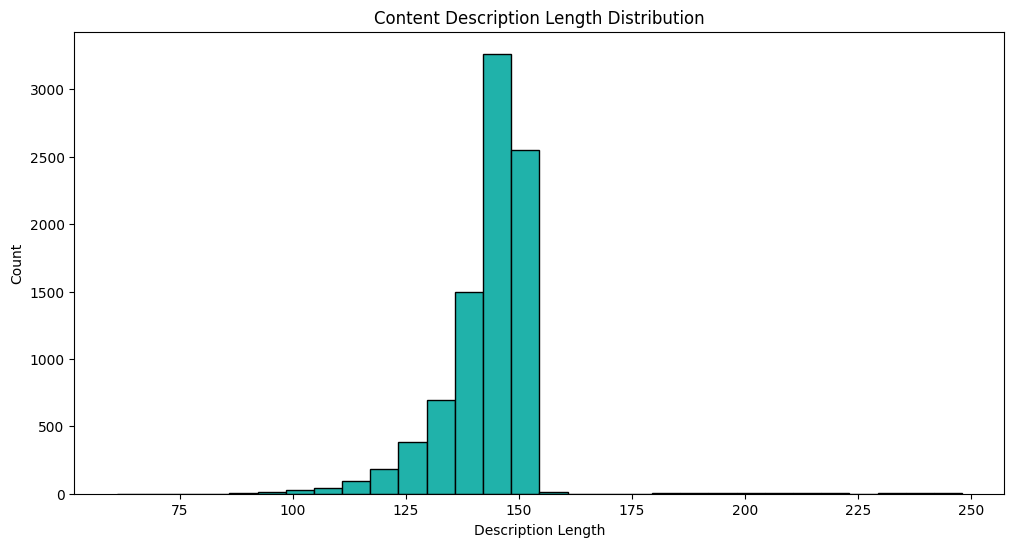

In [118]:
# Açıklamaların uzunluklarını  
data_new['description_length'] = data_new['description'].apply(lambda x: len(str(x)))

# Açıklama uzunluklarının dağılımını görselleştirelim
plt.figure(figsize=(12, 6))
plt.hist(data_new['description_length'], bins=30, color='lightseagreen', edgecolor='black')
plt.title('Content Description Length Distribution')
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.show()


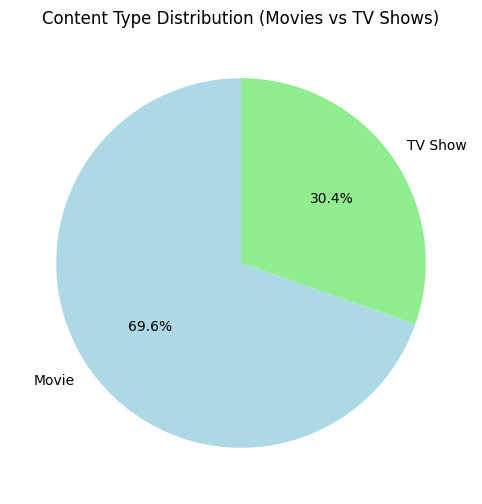

In [119]:
# Türlere göre içerik sayısı ve görselleştirelim
content_type_count = data_new['type'].value_counts()

plt.figure(figsize=(8, 6))
content_type_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Content Type Distribution (Movies vs TV Shows)')
plt.ylabel('')
plt.show()


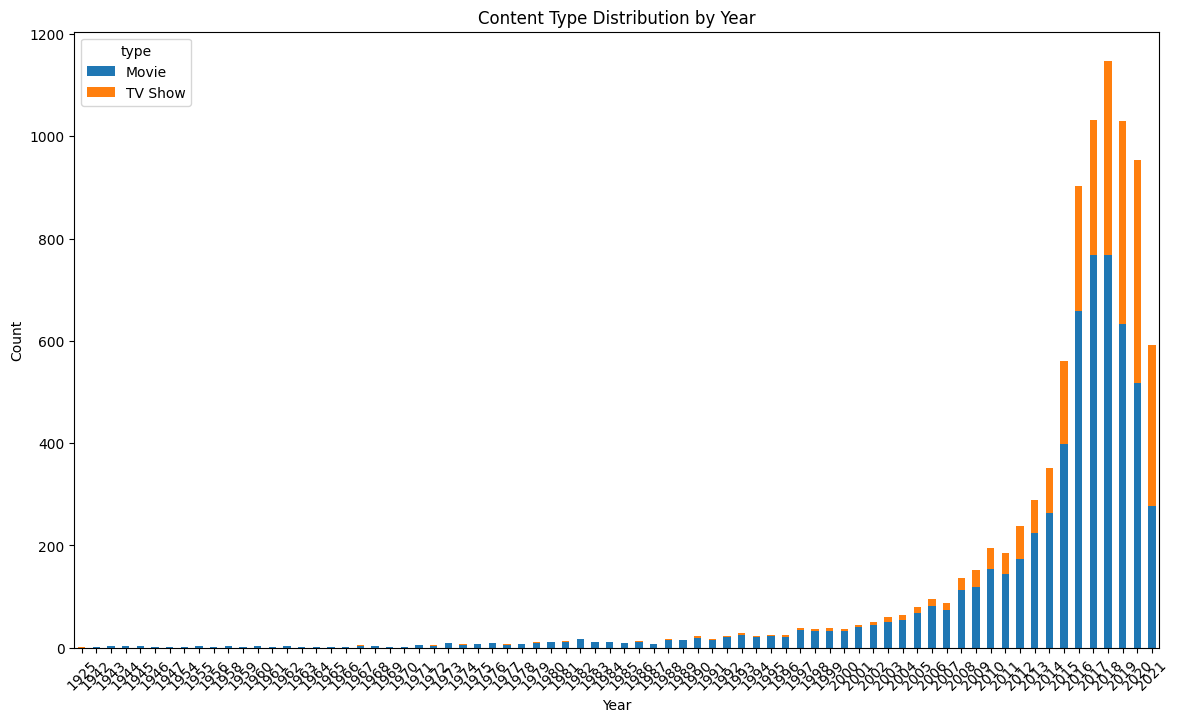

In [120]:
# İçerik türlerinin yıllara göre dağılımı
type_year_distribution = data_new.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Grafiği görselleştirelim
type_year_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Content Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


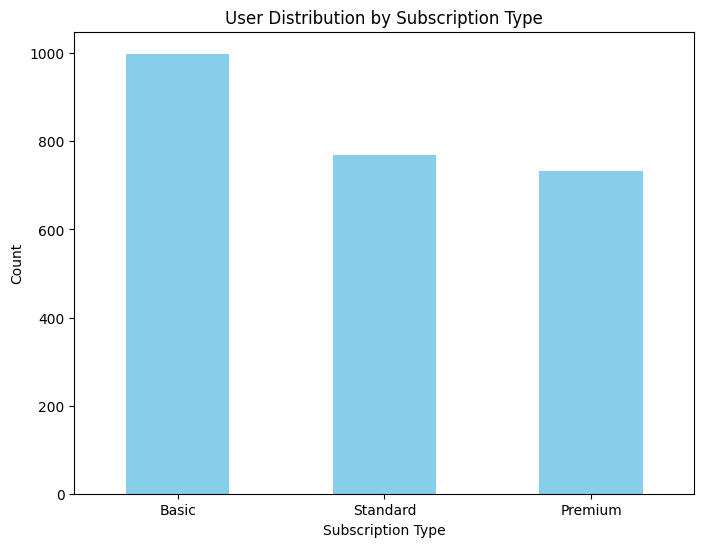

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Yeni veri setini yükleyelim
file_path_userbase = 'Netflix_Userbase.csv'
data_userbase = pd.read_csv(file_path_userbase)

# Abonelik türlerine göre kullanıcı sayısı
subscription_count = data_userbase['Subscription Type'].value_counts()

# görselleştirme
plt.figure(figsize=(8, 6))
subscription_count.plot(kind='bar', color='skyblue')
plt.title('User Distribution by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


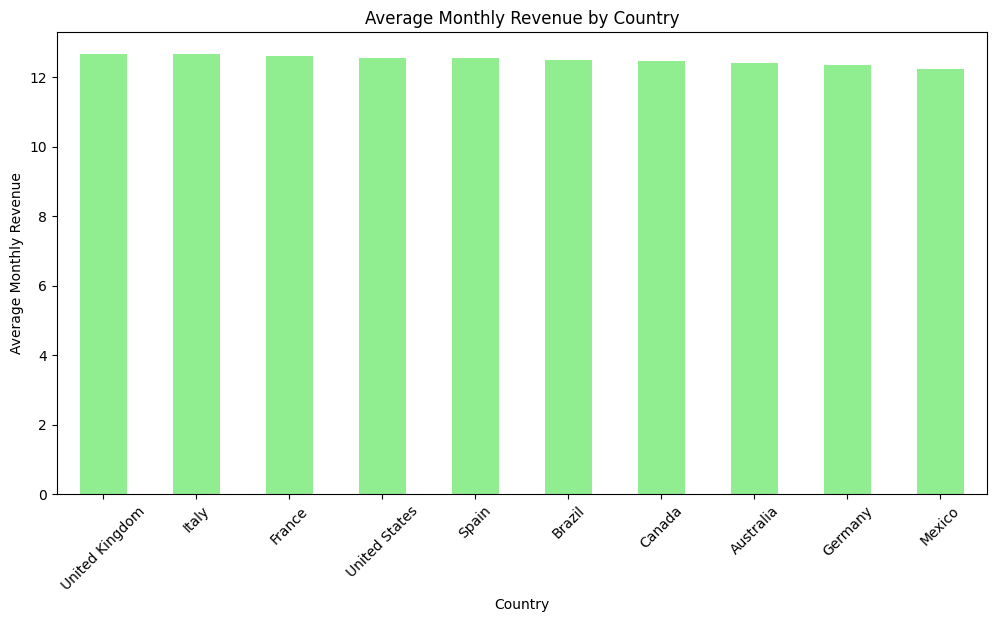

In [122]:
# Ülkelere göre aylık gelir dağılımı
country_revenue = data_userbase.groupby('Country')['Monthly Revenue'].mean().sort_values(ascending=False)

# görselleştirme
plt.figure(figsize=(12, 6))
country_revenue.plot(kind='bar', color='lightgreen')
plt.title('Average Monthly Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Average Monthly Revenue')
plt.xticks(rotation=45)
plt.show()


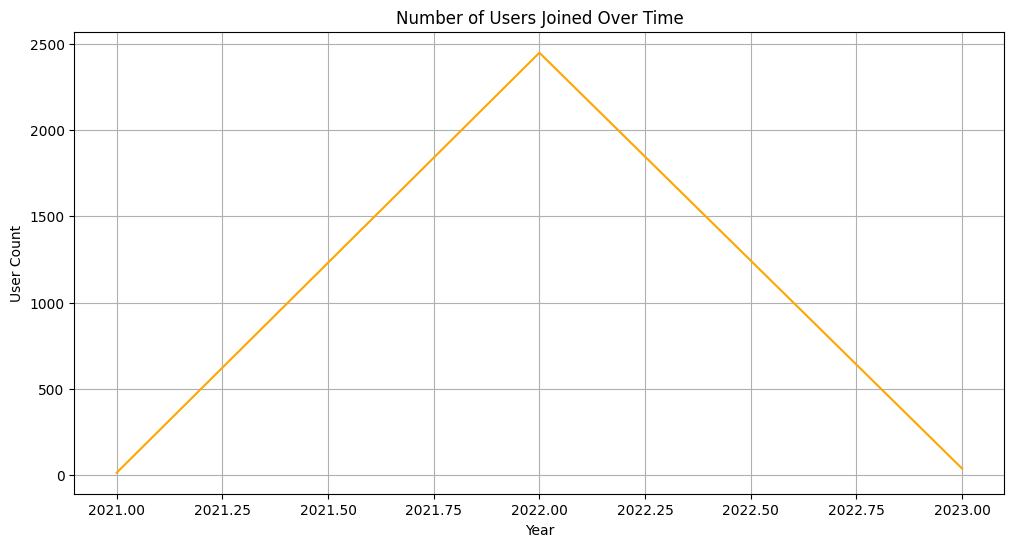

In [123]:
# Katılım tarihini datetime formatına çevirelim
data_userbase['Join Date'] = pd.to_datetime(data_userbase['Join Date'], format='%d-%m-%y')

# Yıl bazında kullanıcı sayısı
join_year_count = data_userbase['Join Date'].dt.year.value_counts().sort_index()

# görselleştirme
plt.figure(figsize=(12, 6))
join_year_count.plot(kind='line', color='orange')
plt.title('Number of Users Joined Over Time')
plt.xlabel('Year')
plt.ylabel('User Count')
plt.grid(True)
plt.show()


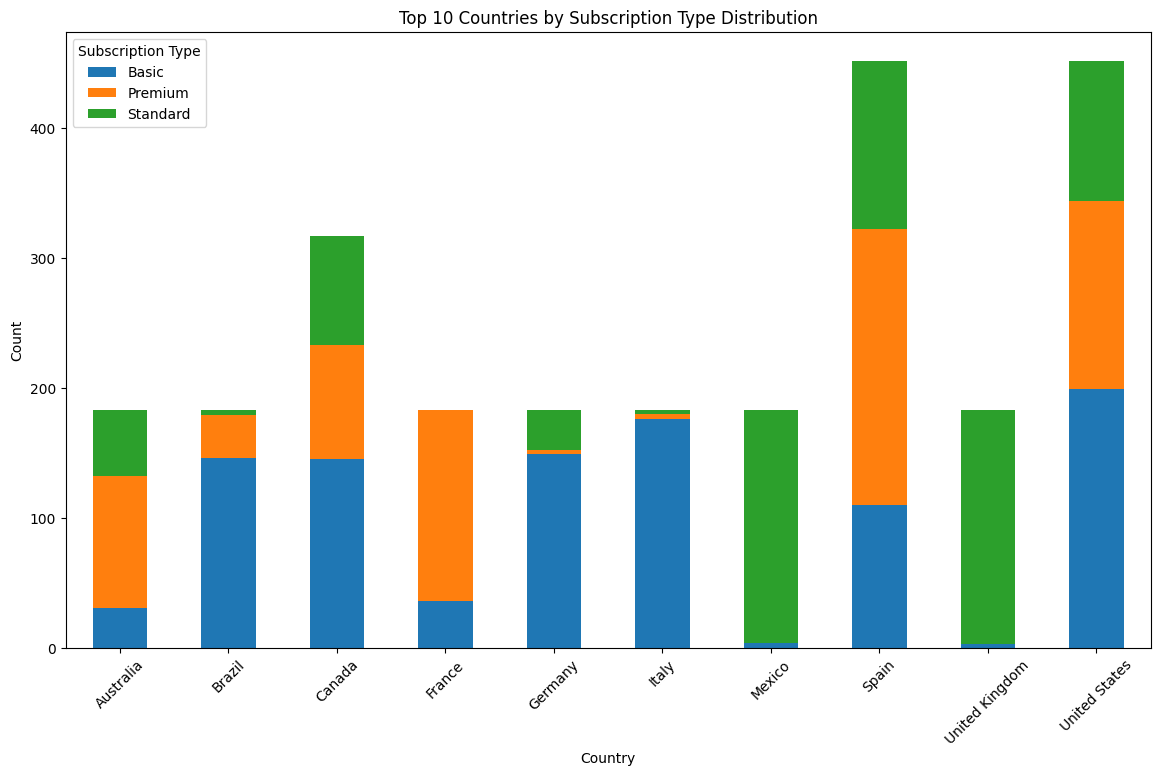

In [124]:
# Ülke ve abonelik türüne göre kullanıcı  sayısı
country_subscription = data_userbase.groupby(['Country', 'Subscription Type']).size().unstack().fillna(0)

# görselleştirme
country_subscription.head(10).plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 10 Countries by Subscription Type Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


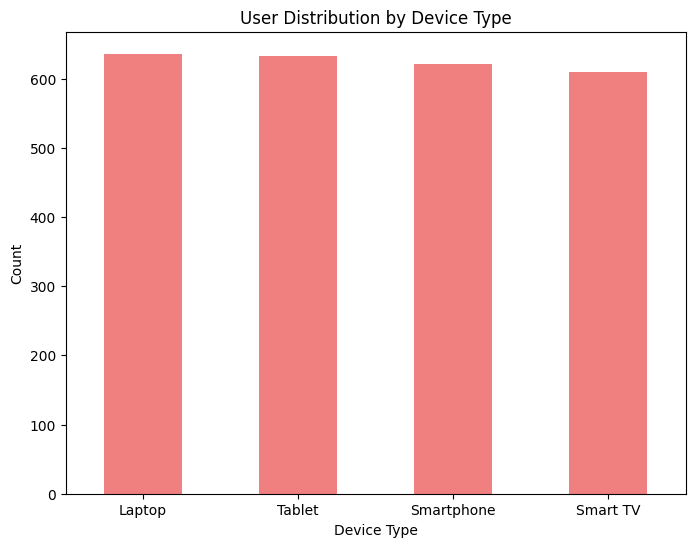

In [125]:
# Cihaz türlerine göre kullanıcı  sayısı
device_count = data_userbase['Device'].value_counts()

# görselleştirme
plt.figure(figsize=(8, 6))
device_count.plot(kind='bar', color='lightcoral')
plt.title('User Distribution by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


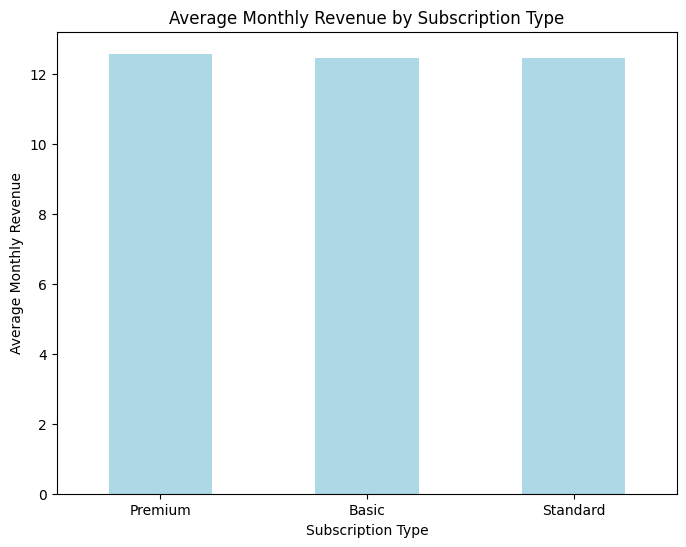

In [126]:
# Abonelik türüne göre ortalama aylık gelir  
subscription_revenue = data_userbase.groupby('Subscription Type')['Monthly Revenue'].mean().sort_values(ascending=False)

# görselleştirme
plt.figure(figsize=(8, 6))
subscription_revenue.plot(kind='bar', color='lightblue')
plt.title('Average Monthly Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Average Monthly Revenue')
plt.xticks(rotation=0)
plt.show()


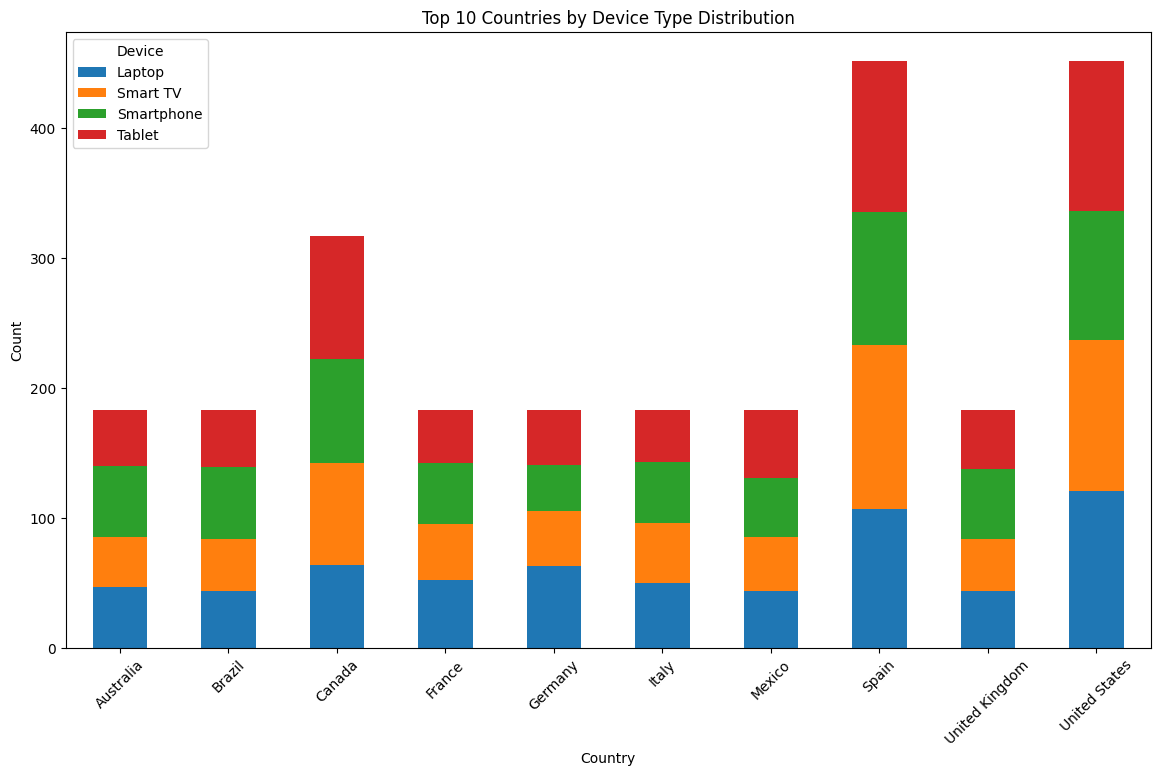

In [127]:
# Ülke ve cihaz türü arasındaki ilişki
country_device_count = data_userbase.groupby(['Country', 'Device']).size().unstack().fillna(0)

# görselleştirme
country_device_count.head(10).plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 10 Countries by Device Type Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/v3/p30r3kw502zc4g5s4k8j6td40000gn/T/ipykernel_22435/3114070773.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_subscription_count = data_userbase.groupby(['Age Group', 'Subscription Type']).size().unstack().fillna(0)


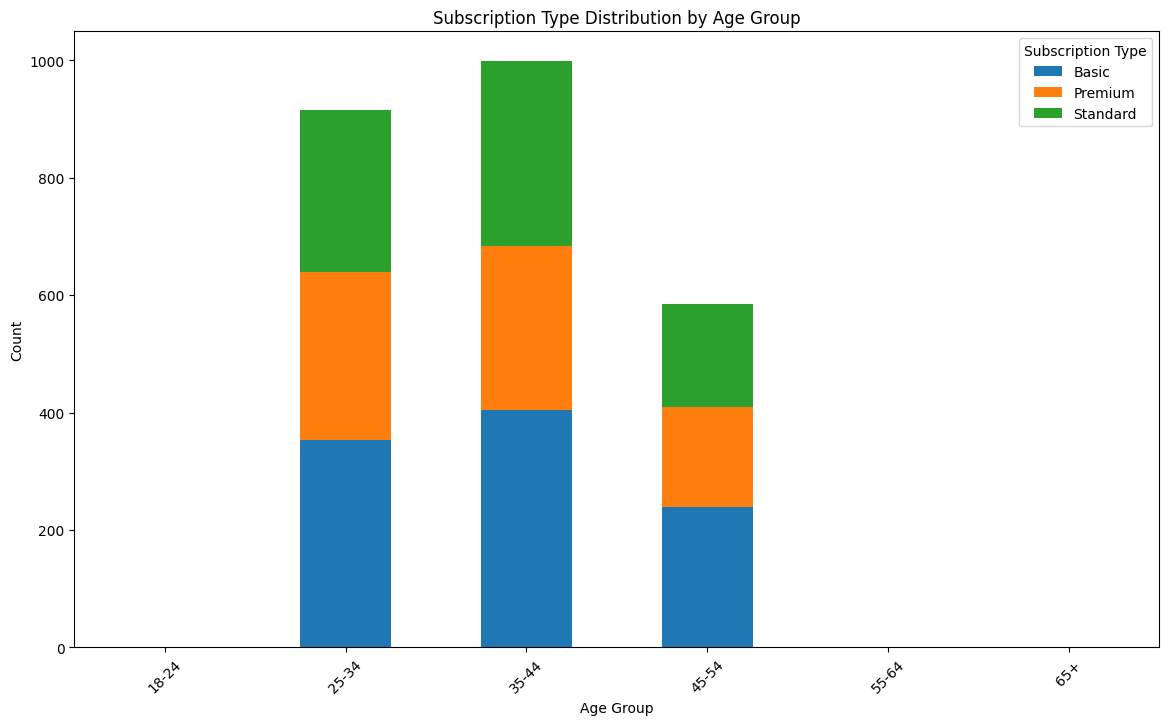

In [128]:
# Kullanıcı yaş aralıkları
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data_userbase['Age Group'] = pd.cut(data_userbase['Age'], bins=bins, labels=labels)

# Yaş grubuna göre abonelik türü sayısı
age_subscription_count = data_userbase.groupby(['Age Group', 'Subscription Type']).size().unstack().fillna(0)

# görselleştirme
age_subscription_count.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Subscription Type Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

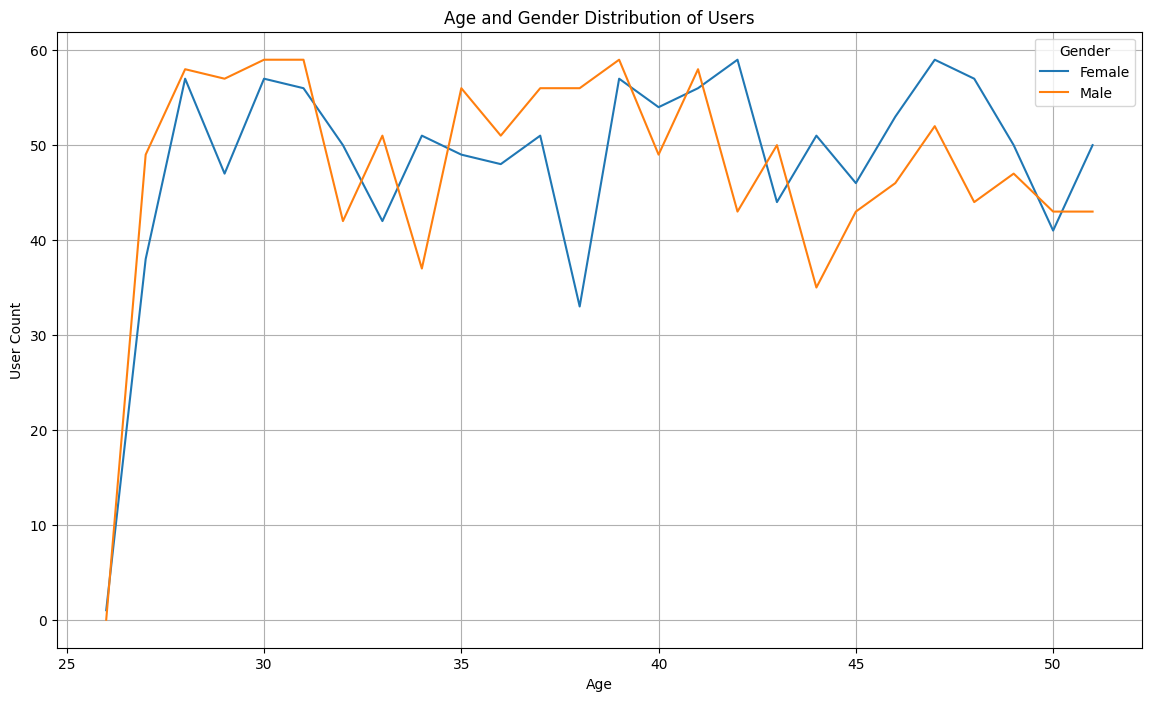

In [129]:
# Yaş ve cinsiyet dağılımı
age_gender_distribution = data_userbase.groupby(['Age', 'Gender']).size().unstack().fillna(0)

# görselleştirme
age_gender_distribution.plot(kind='line', figsize=(14, 8))
plt.title('Age and Gender Distribution of Users')
plt.xlabel('Age')
plt.ylabel('User Count')
plt.grid(True)
plt.show()


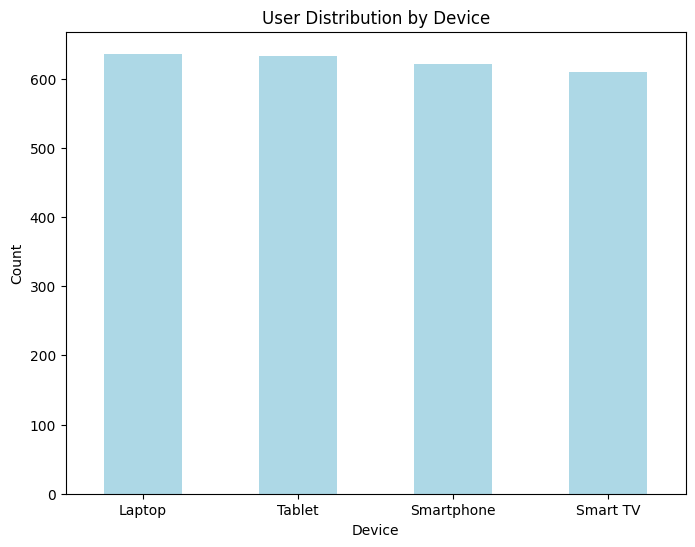

In [130]:
# Cihaz türlerine göre kullanıcı sayısı
device_user_count = data_userbase['Device'].value_counts()

# görselleştirme
plt.figure(figsize=(8, 6))
device_user_count.plot(kind='bar', color='lightblue')
plt.title('User Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

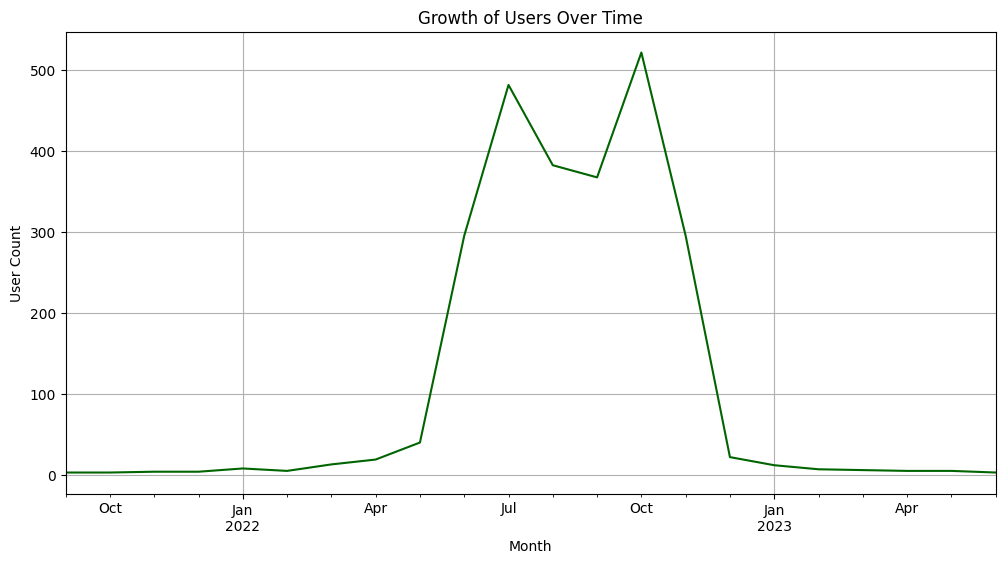

In [131]:
# Katılım tarihine göre kullanıcı  sayısı
join_month_count = data_userbase['Join Date'].dt.to_period('M').value_counts().sort_index()

# görselleştirme
plt.figure(figsize=(12, 6))
join_month_count.plot(kind='line', color='darkgreen')
plt.title('Growth of Users Over Time')
plt.xlabel('Month')
plt.ylabel('User Count')
plt.grid(True)
plt.show()

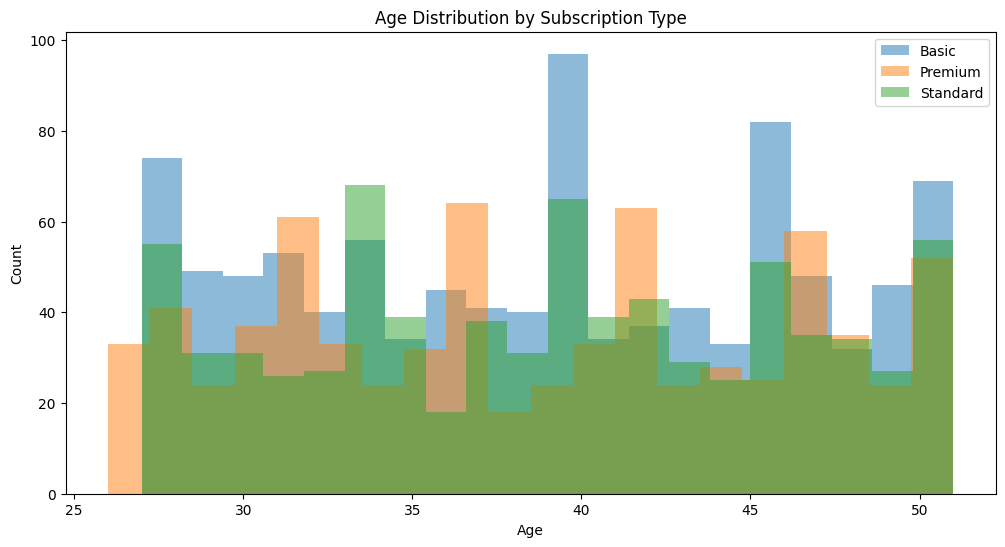

In [132]:
# Abonelik türüne göre kullanıcı yaş dağılımı
plt.figure(figsize=(12, 6))
for subscription in data_userbase['Subscription Type'].unique():
    subset = data_userbase[data_userbase['Subscription Type'] == subscription]
    plt.hist(subset['Age'], bins=20, alpha=0.5, label=subscription)

plt.title('Age Distribution by Subscription Type')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [133]:
# Kullanıcı verilerinde yaş, cinsiyet ve izleme alışkanlıklarına göre öneri sistemi 
# Kullanıcıların yaşları
data_userbase['Age Group'] = pd.cut(data_userbase['Age'], bins=[0, 18, 30, 40, 50, 60, 100], 
                                    labels=['0-18', '18-30', '30-40', '40-50', '50-60', '60+'])

user_preferences = data_userbase[['User ID', 'Age Group', 'Gender', 'Subscription Type']]

user_preferences.head()


,User ID,Age Group,Gender,Subscription Type
0,1,18-30,Male,Basic
1,2,30-40,Female,Premium
2,3,40-50,Male,Standard
3,4,50-60,Female,Standard
4,5,30-40,Male,Basic


In [134]:
# Basit içerik tabanlı öneri sistemi 
def content_based_recommendation(user_id):
    # Kullanıcının bilgileri 
    user_data = user_preferences[user_preferences['User ID'] == user_id]
    user_age_group = user_data['Age Group'].values[0]
    user_gender = user_data['Gender'].values[0]
    user_subscription = user_data['Subscription Type'].values[0]

    # Öneriler oluşturmak için benzer özelliklere sahip kullanıcılar
    recommendations = user_preferences[
        (user_preferences['Age Group'] == user_age_group) & 
        (user_preferences['Subscription Type'] == user_subscription) & 
        (user_preferences['Gender'] == user_gender)
    ]

    return recommendations

# Örnek bir kullanıcı için öneri 
recommendations_for_user = content_based_recommendation(1)
recommendations_for_user.head()


,User ID,Age Group,Gender,Subscription Type
0,1,18-30,Male,Basic
13,14,18-30,Male,Basic
70,71,18-30,Male,Basic
141,142,18-30,Male,Basic
154,155,18-30,Male,Basic


In [135]:
# Kullanıcı verilerindeki temel bilgiler
user_data_clean = data_userbase[['User ID', 'Age Group', 'Gender', 'Subscription Type']].copy() 

# Kullanıcıları yaş grubu, cinsiyet ve abonelik türüne göre gruplama
user_data_clean.loc[:, 'Age Group'] = user_data_clean['Age Group'].astype(str)

user_data_clean.head()


,User ID,Age Group,Gender,Subscription Type
0,1,18-30,Male,Basic
1,2,30-40,Female,Premium
2,3,40-50,Male,Standard
3,4,50-60,Female,Standard
4,5,30-40,Male,Basic


In [136]:
# Kullanıcıların yaş grubu ve abonelik türlerine göre benzerlik hesaplaması
user_data_clean['Age Group'] = user_data_clean['Age Group'].astype('category')
user_data_clean['Gender'] = user_data_clean['Gender'].astype('category')
user_data_clean['Subscription Type'] = user_data_clean['Subscription Type'].astype('category')

# Kategorik verileri sayısal verilere dönüştürme
user_data_clean['Age Group Code'] = user_data_clean['Age Group'].cat.codes
user_data_clean['Gender Code'] = user_data_clean['Gender'].cat.codes
user_data_clean['Subscription Type Code'] = user_data_clean['Subscription Type'].cat.codes

user_data_clean.head()


,User ID,Age Group,Gender,Subscription Type,Age Group Code,Gender Code,Subscription Type Code
0,1,18-30,Male,Basic,1,1,0
1,2,30-40,Female,Premium,2,0,1
2,3,40-50,Male,Standard,3,1,2
3,4,50-60,Female,Standard,4,0,2
4,5,30-40,Male,Basic,2,1,0


In [146]:
# Kullanıcılar arasındaki benzerlikleri hesaplamak için euclidean mesafesi yöntemi
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Kullanıcıların özellikleri 
user_features = user_data_clean[['Age Group Code', 'Gender Code', 'Subscription Type Code']].values

# Benzerlik matrisini  
similarity_matrix = cosine_similarity(user_features)

# Öneri sistemi: Bir kullanıcı için en benzer kullanıcıları bulma
def recommend_users(user_id, top_n=5):
    user_index = user_data_clean[user_data_clean['User ID'] == user_id].index[0]
    similar_users = list(enumerate(similarity_matrix[user_index]))
    similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)
    similar_users = similar_users[1:top_n+1]
    
    recommended_users = [user_data_clean.iloc[i[0]]['User ID'] for i in similar_users]
    return recommended_users

# Örnek bir kullanıcı için öneriler 
recommended_for_user = recommend_users(1)
print("Recommended Users: ", recommended_for_user)



Recommended Users:  [14, 71, 142, 155, 167]


In [145]:
# Birden fazla kullanıcı için öneri 
def recommend_for_multiple_users(user_ids, top_n=5):
    recommendations = {}
    for user_id in user_ids:
        recommendations[user_id] = recommend_users(user_id, top_n)
    return recommendations

# Örnek kullanıcı listesi
user_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

# Her kullanıcı için öneri 
multiple_user_recommendations = recommend_for_multiple_users(user_ids)
for user_id, recommended_users in multiple_user_recommendations.items():
    print(f"For user {user_id} , recommended users: {recommended_users}")


For user 1 , recommended users: [14, 71, 142, 155, 167]
For user 2 , recommended users: [4, 19, 29, 41, 69]
For user 3 , recommended users: [7, 18, 78, 88, 128]
For user 4 , recommended users: [4, 19, 29, 41, 69]
For user 5 , recommended users: [22, 32, 42, 52, 62]
For user 6 , recommended users: [15, 21, 31, 39, 43]
For user 7 , recommended users: [7, 18, 78, 88, 128]
For user 8 , recommended users: [11, 17, 25, 27, 35]
For user 9 , recommended users: [24, 28, 38, 48, 58]
For user 10 , recommended users: [74, 77, 101, 106, 116]


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# İçerik açıklamalarına dayalı öneri yapma
##İçerik Tabanlı Filtreleme (Content-based Filtering
##Kullanıcıların izlediği içeriklere benzer içerikleri önerir.
##Örneğin, içeriklerin türü, oyuncuları, yönetmenleri gibi özellikler kullanılarak öneriler yapılır.
tfidf = TfidfVectorizer(stop_words='english')
data_new['description'] = data_new['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(data_new['description'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Örnek olarak 0. indeksteki filmi önerme
indices = pd.Series(data_new.index, index=data_new['title']).drop_duplicates()
idx = indices['Dick Johnson Is Dead']  # Örnek bir içerik
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:6]  # En benzer 5 içerik

movie_indices = [i[0] for i in sim_scores]
recommended_titles = data_new['title'].iloc[movie_indices]
print(recommended_titles)


4877                                   End Game
1066                                   The Soul
7506                                       Moon
5047                    The Cloverfield Paradox
5233    The Death and Life of Marsha P. Johnson
Name: title, dtype: object


In [140]:
from sklearn.neighbors import NearestNeighbors

# Kullanıcı verisi üzerinde işbirlikçi filtreleme için örnek
## Kullanıcıların izleme alışkanlıklarını analiz ederek benzer zevklere sahip kişilere dayalı önerilerde bulunur.
userbase_data = data_userbase.dropna(subset=['Age', 'Gender'])  # Boş değerleri temizleme
X = pd.get_dummies(userbase_data[['Age', 'Gender']], drop_first=True)

# Kullanıcı benzerliklerini hesaplama
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)
distances, indices = knn.kneighbors(X.iloc[0:1])  # 1. kullanıcıyı örnek alarak benzer kullanıcıları bulma

# Benzer kullanıcıların ID'lerini alma
print(userbase_data.iloc[indices[0]])


      User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
2475     2476             Basic               13 2022-08-31          15-07-23   
535       536             Basic               10 2022-06-14          29-06-23   
968       969           Premium               12 2022-09-02          30-06-23   
1822     1823          Standard               10 2022-10-28          06-07-23   
1348     1349           Premium               14 2022-09-03          03-07-23   

            Country  Age Gender    Device Plan Duration Age Group  
2475         France   28   Male    Tablet       1 Month     18-30  
535   United States   28   Male  Smart TV       1 Month     18-30  
968          Canada   28   Male  Smart TV       1 Month     18-30  
1822  United States   28   Male    Tablet       1 Month     18-30  
1348      Australia   28   Male    Laptop       1 Month     18-30  


In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Kullanıcıların hangi abonelik türüne sahip olacaklarını tahmin etmek için makine öğrenmesi 
# Kullanıcı bilgilerini kullanarak abonelik türünü tahmin etme
X = pd.get_dummies(userbase_data[['Age', 'Gender', 'Device']], drop_first=True)
y = userbase_data['Subscription Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       Basic       0.39      0.48      0.43       292
     Premium       0.30      0.27      0.28       227
    Standard       0.30      0.24      0.26       231

    accuracy                           0.34       750
   macro avg       0.33      0.33      0.33       750
weighted avg       0.33      0.34      0.33       750



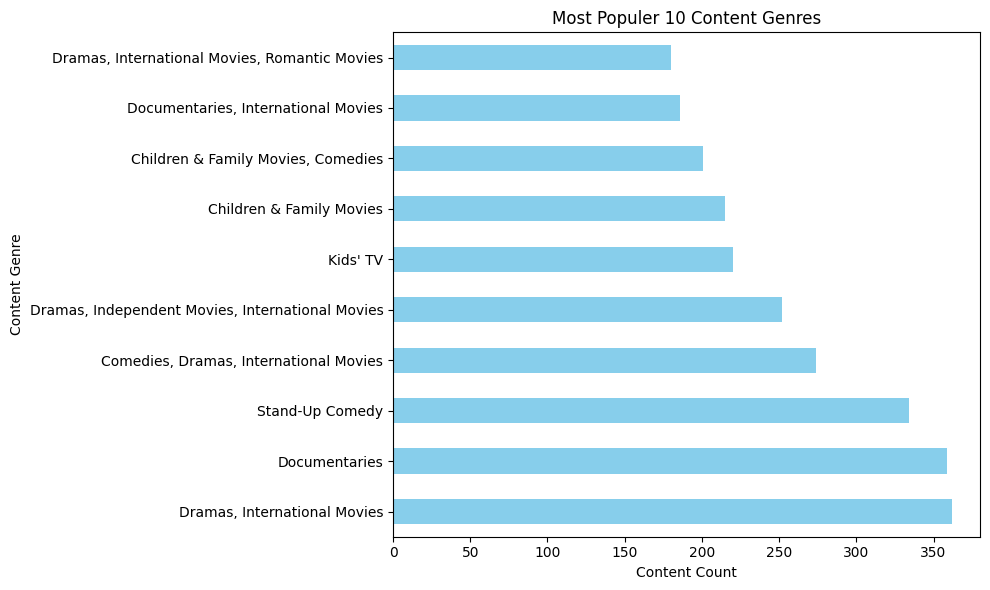

In [142]:
# En popüler 10 kategoriye odaklanma
top_10_genres = genre_popularity.head(10)

# Yatay bar grafiği oluşturma
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='barh', color='skyblue')

# Başlık ve etiketler
plt.title('Most Populer 10 Content Genres')
plt.xlabel('Content Count')
plt.ylabel('Content Genre')

plt.tight_layout()
plt.show()


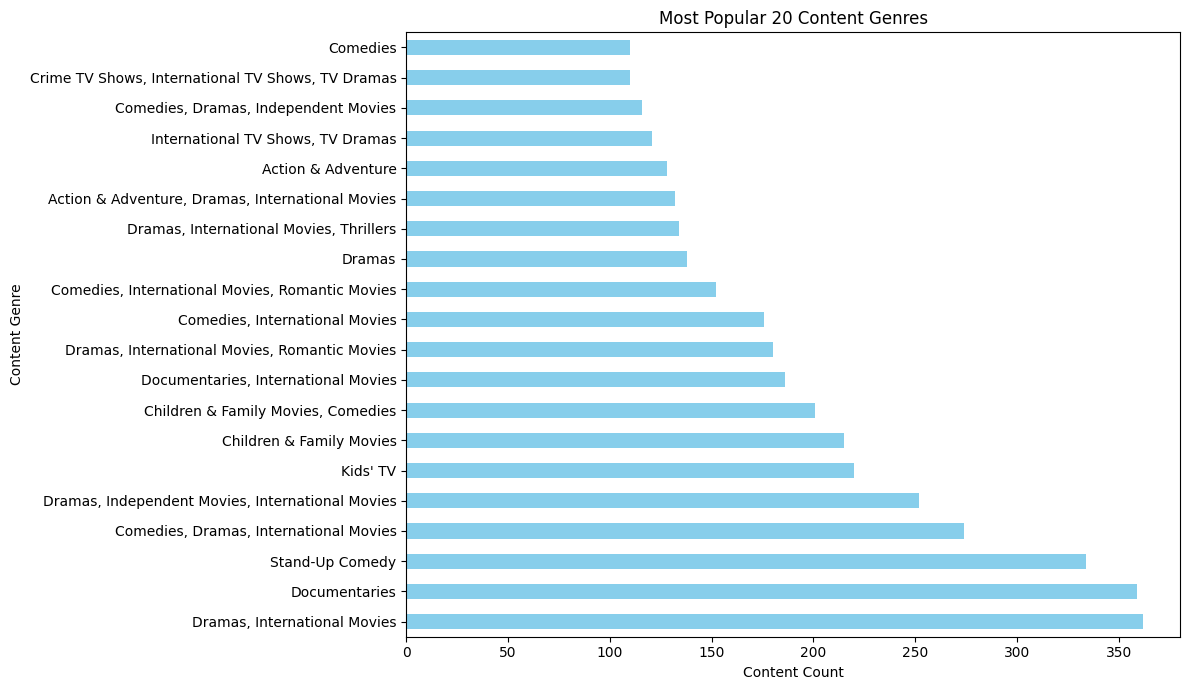

In [143]:
# Kategorilerin sayısını 20'ye sınırlama
filtered_genres = genre_popularity.head(20)

# Yatay bar grafiği
plt.figure(figsize=(12, 7))
filtered_genres.plot(kind='barh', color='skyblue')

# Başlık ve etiketler
plt.title('Most Popular 20 Content Genres')
plt.xlabel('Content Count')
plt.ylabel('Content Genre')

plt.tight_layout()
plt.show()
